In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            # Construct full filepath
            filepath = os.path.join(dirpath, filename)
            # Check if the file exists and add its size
            if os.path.exists(filepath):
                total_size += os.path.getsize(filepath)
    return total_size

# Example usage
directory = '/kaggle/input'
size_in_bytes = get_directory_size(directory)
print(f"Total size: {size_in_bytes} bytes")

Total size: 0 bytes


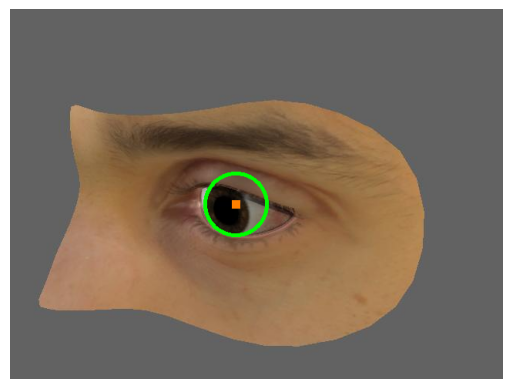

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'C:/Users/lurpd/Documents/Development/Datasets/TestSet/TestSet/BottomRight/2.jpg'
eye_img = cv2.imread(image_path)

# Step 3: Check if the image is loaded correctly
if eye_img is None:
    print("Error: Image not loaded properly. Check the file path or upload the image again.")
else:
    # Convert the image to grayscale
    gray_eye = cv2.cvtColor(eye_img, cv2.COLOR_BGR2GRAY)

    # Optionally, apply a Gaussian blur to reduce noise
    gray_eye = cv2.GaussianBlur(gray_eye, (7, 7), 0)

    # Step 4: Detect iris using HoughCircles
    circles = cv2.HoughCircles(
        gray_eye,
        cv2.HOUGH_GRADIENT,
        dp=1.2, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=50
    )

    # Ensure some circles were found
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        # Get the image dimensions
        h, w = gray_eye.shape

        # Find the center of the image (approximate center of the eye)
        center_x, center_y = w // 2, h // 2

        # Filter circles to only keep the one closest to the center
        closest_circle = None
        min_distance = float("inf")

        for (x, y, r) in circles:
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance < min_distance:
                min_distance = distance
                closest_circle = (x, y, r)

        # Draw the circle closest to the center
        if closest_circle is not None:
            (x, y, r) = closest_circle
            # Draw the outer circle
            cv2.circle(eye_img, (x, y), r, (0, 255, 0), 4)
            # Draw a rectangle at the center
            cv2.rectangle(eye_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        # Display the image with the detected iris
        plt.imshow(cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("No circles were detected. Try adjusting the parameters.")
